# 多項式特徴量で線形を超える！

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset('mpg')

# NaNがある行をすべて削除
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

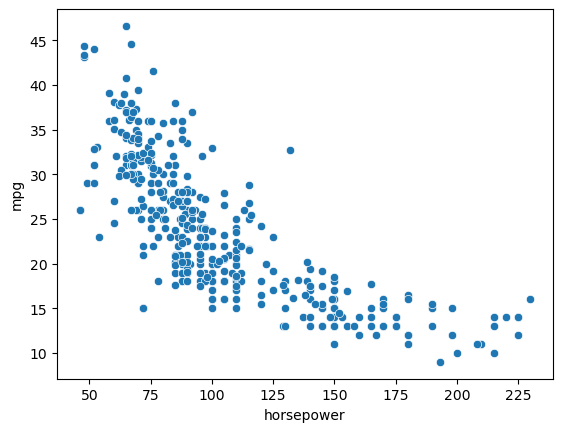

In [4]:
#x,yをキーワード引数として渡してと警告されているが、分布を見るだけなので無視
sns.scatterplot(df['horsepower'], df['mpg'])

In [9]:
#多項式特徴量に変換(d = 2)
from sklearn.preprocessing import PolynomialFeatures

#引数にinclude_bias = Falseを指定するとバイアス項を生成しない
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#3つ目がX^2の列になる 
X_poly

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)
model.coef_

array([ 0.        , -0.46618963,  0.00123054])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


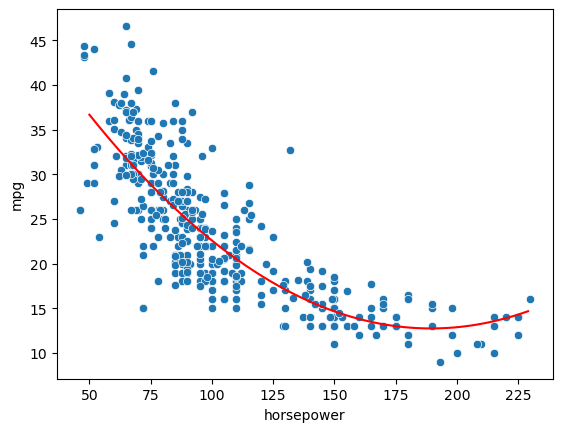

In [19]:
import numpy as np

# x軸
x = np.arange(50, 230).reshape(-1, 1)

#predict前にfit_transformでX^2列追加
x_ = poly.fit_transform(x)
pred_ = model.predict(x_)

sns.scatterplot(df['horsepower'], df['mpg'])
plt.plot(x, pred_, 'r')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


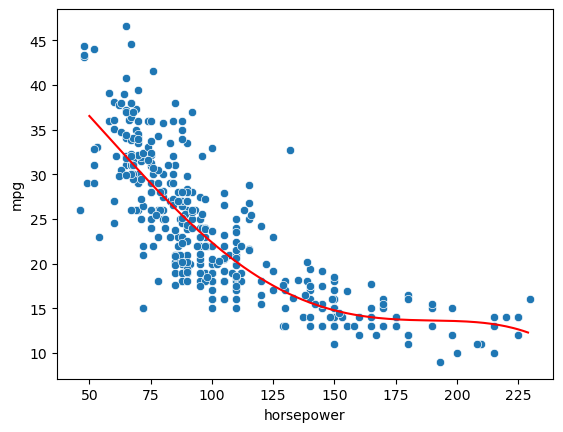

In [28]:
#d=４でやってみる => あまりd=2と変わらないが、d=4以降は歪み出す(フィットしすぎ？？)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

x = np.arange(50, 230).reshape(-1, 1)

x_ = poly.fit_transform(x)
pred_ = model.predict(x_)

sns.scatterplot(df['horsepower'], df['mpg'])
plt.plot(x, pred_, 'r')

## 質的変数を説明変数として使う方法を解説

In [3]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# pd.get_dummies()でone-hotエンコーディング

#drop_duplicates()で重複した　rowが削除されて、使用しているカテゴリーがわかる
df['cut'].drop_duplicates()


0        Ideal
1      Premium
2         Good
5    Very Good
8         Fair
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [9]:
import pandas as pd

# ダミー変数トラップを忘れないようにする(drop_first)
pd.get_dummies(df[['cut']], drop_first=True)

,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
53935,1,0,0,0,0
53936,0,0,0,1,0
53937,0,0,1,0,0
53938,0,1,0,0,0


In [24]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

X = df.loc[:, df.columns != 'price']
y = df['price']

cv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(np.abs(np.mean(scores)))

740.5483989635775


In [36]:
#質的変数を入れない場合

model = LinearRegression()

#isin()でtrueを返すからその否定
df = sns.load_dataset('diamonds')
X = df.loc[:, ~df.columns.isin(['price', 'cut', 'clarity', 'color'])]
y = df['price']

cv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
print(np.abs(np.mean(scores)))

890.1499487422165


## 正則化項を用いて特徴量選択をする(Lasso)

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [66]:
#欠損値対応
df.dropna(inplace=True)

#ダミー変数
df = pd.get_dummies(df, drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [42]:
from sklearn.model_selection import train_test_split

target = 'Salary'

X = df.loc[:, df.columns != target]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#学習データの標準化に使用した平均、標準偏差をテストデータに使用する！！！！
X_test = scaler.transform(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

117704.4033881705


In [57]:
# 係数確認
model.coef_

array([-263.93021843,  267.26811881,   42.953601  ,  -33.47452958,
          7.47725776,  125.12341811,  -29.67148909, -238.55413784,
        329.80466506,   -3.98547868,  259.40614775,    0.        ,
       -161.2607052 ,   71.00768965,   40.39356866,  -30.35965777,
         -0.        ,  -47.8140956 ,   13.94948672])

In [51]:
#Lassoのλ値ごとの係数変化
mse_list = []
coefs = []
alphas = np.linspace(0.01, 300, 100)
for alpha in alphas:
    model = Lasso(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+05, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'standardized coefficents')

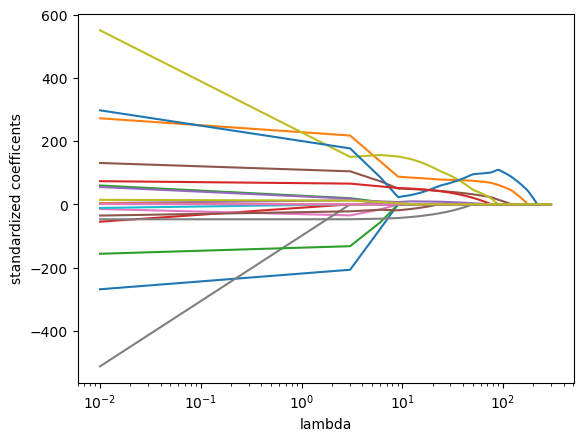

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('standardized coefficents')


## kNN回帰(k最近傍法: k Nearest Neighbor)アルゴリズムをわかりやすく解説

Text(0, 0.5, 'mpg')

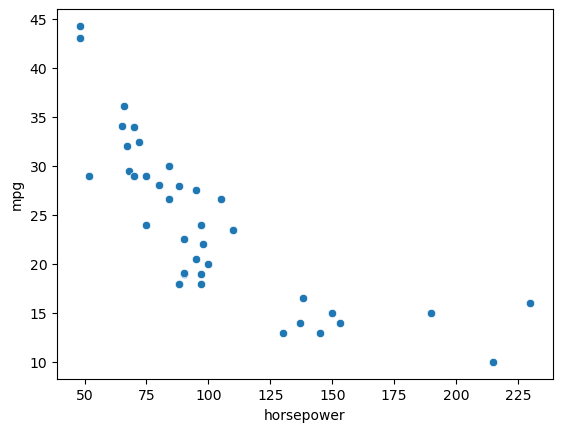

In [75]:

df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [78]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

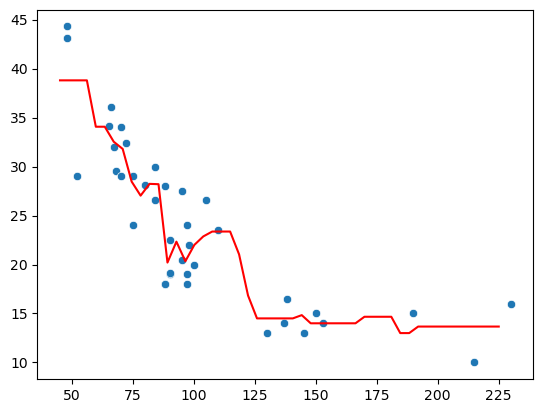

In [95]:
x_axis = np.linspace(45, 225).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(x_axis, y_pred, 'red')

In [97]:
#最適なk値を見つける
from sklearn.model_selection import cross_val_score

score_list = []
k_list = np.arange(1, 30)
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    score_list.append(-np.mean(scores))
print(f'Best performance: k={k_list[np.argmin(score_list)]}, cv_error={np.min(score_list)}')

Best performance: k=13, cv_error=18.246332680352378


Text(0, 0.5, '5fold cv error')

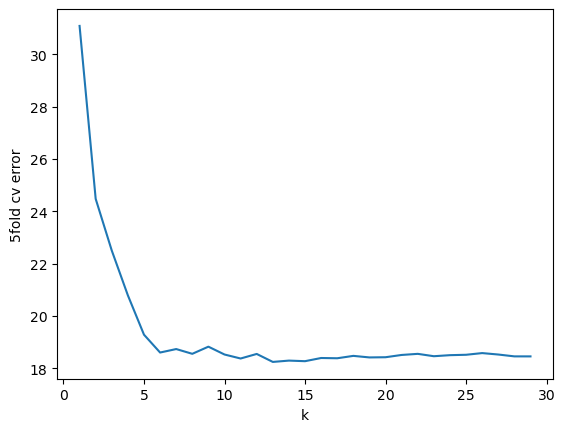

In [98]:
plt.plot(k_list, score_list)
plt.xlabel('k')
plt.ylabel('5fold cv error')